In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, Math
import numpy as np
import h5py

In [69]:
start_date_feb = pd.Timestamp('20230201')
end_date_feb = pd.Timestamp('20230228')

zones = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']
zones_non_fbmc = ["CH", "GB", "ES", "IT_NORD"]
plant_types = [
    "biomass", "brown_coal", "coal_gas", "natural_gas", "hard_coal", "oil", "hydro", 
    "nuclear", "waste", "other"
] 

In [106]:
df_gen_obs = pd.read_excel('./data/generation.xlsx', sheet_name='NL', index_col=0)
df_gen_obs = df_gen_obs[(df_gen_obs.index > start_date_feb) & (df_gen_obs.index < end_date_feb)]
display(df_gen_obs)

,biomass,brown_coal,coal_gas,natural_gas,hard_coal,oil,hydro,nuclear,waste,other,solar,wind_onshore,wind_offshore,other_renewable
2023-02-01 01:00:00,45.00,0.0,0.0,1364.00,919.50,0.0,0.0,487.00,392.25,2419.25,0.0,2024.00,2175.00,0.0
2023-02-01 02:00:00,45.00,0.0,0.0,1239.00,823.00,0.0,0.0,486.75,396.50,2533.75,0.0,2152.00,2191.00,0.0
2023-02-01 03:00:00,45.00,0.0,0.0,1248.75,807.00,0.0,0.0,486.00,389.50,2572.75,0.0,2195.25,2182.25,0.0
2023-02-01 04:00:00,45.00,0.0,0.0,1248.75,824.00,0.0,0.0,486.00,368.00,2607.00,0.0,2210.50,2157.50,0.0
2023-02-01 05:00:00,45.00,0.0,0.0,1334.25,859.00,0.0,0.0,486.00,369.75,2646.50,0.0,2219.25,2202.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27 19:00:00,16.00,0.0,0.0,8039.00,3209.25,0.0,0.0,485.00,391.25,3732.50,0.0,720.75,1543.00,0.0
2023-02-27 20:00:00,16.25,0.0,0.0,8141.75,3203.50,0.0,0.0,485.50,382.75,3626.25,0.0,713.75,1532.50,0.0
2023-02-27 21:00:00,16.25,0.0,0.0,8177.00,3195.25,0.0,0.0,485.50,375.00,3355.50,0.0,703.25,1337.00,0.0
2023-02-27 22:00:00,16.00,0.0,0.0,8007.25,3214.25,0.0,0.0,485.00,381.50,3022.75,0.0,504.00,1203.25,0.0


In [113]:
hf_forecast_basic = h5py.File("./generation_forecasts/basic_a10_feb.jld", "r")
hf_forecast_io = h5py.File("./generation_forecasts/io_a10_feb_7.jld", "r")

g_forecast_basic = np.transpose(hf_forecast_basic.get("data"))
g_forecast_io = np.transpose(hf_forecast_io.get("data"))

In [114]:
np.shape(g_forecast_basic)

(18, 10, 4345)

In [115]:
def draw_generation_timeseries(technology):
    tech = plant_types.index(technology)
    for z, zone in enumerate(zones + zones_non_fbmc):
        if zone in zones_non_fbmc:
            df_gen_obs = pd.read_excel('./data/generation_non_fbmc.xlsx', sheet_name=zone, index_col=0)
        else:
            df_gen_obs = pd.read_excel('./data/generation.xlsx', sheet_name=zone, index_col=0)
            
        df_gen_obs = df_gen_obs[(df_gen_obs.index > start_date_feb) & (df_gen_obs.index < end_date_feb)]

        plt.figure(figsize=(15,6))
        plt.plot(df_gen_obs[technology], label="observed")
        plt.plot(df_gen_obs[technology].index, g_forecast_basic[z + 2, tech, 0:647], label="basic")
        plt.plot(df_gen_obs[technology].index, g_forecast_io[z + 2, tech, 0:647], label="IO")
        
        plt.title("{0}: {1} generation levels in February, 2023".format(zone, technology))
        plt.ylabel('Generation [MW]')
        plt.xlabel('Time [day] (hourly resolution)')
        plt.legend()
        plt.show()

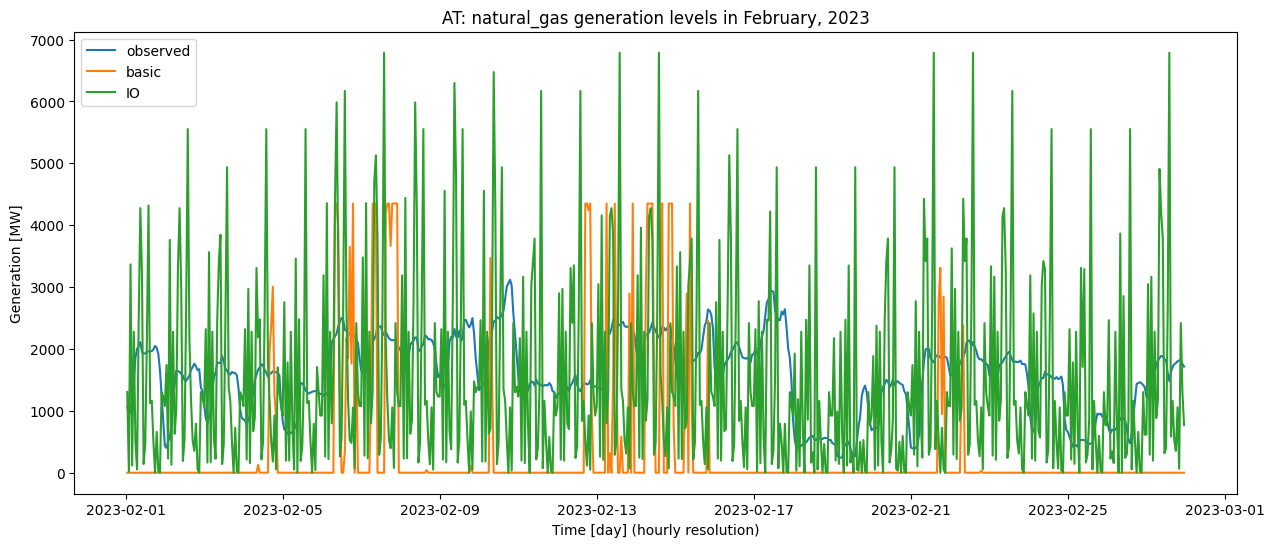

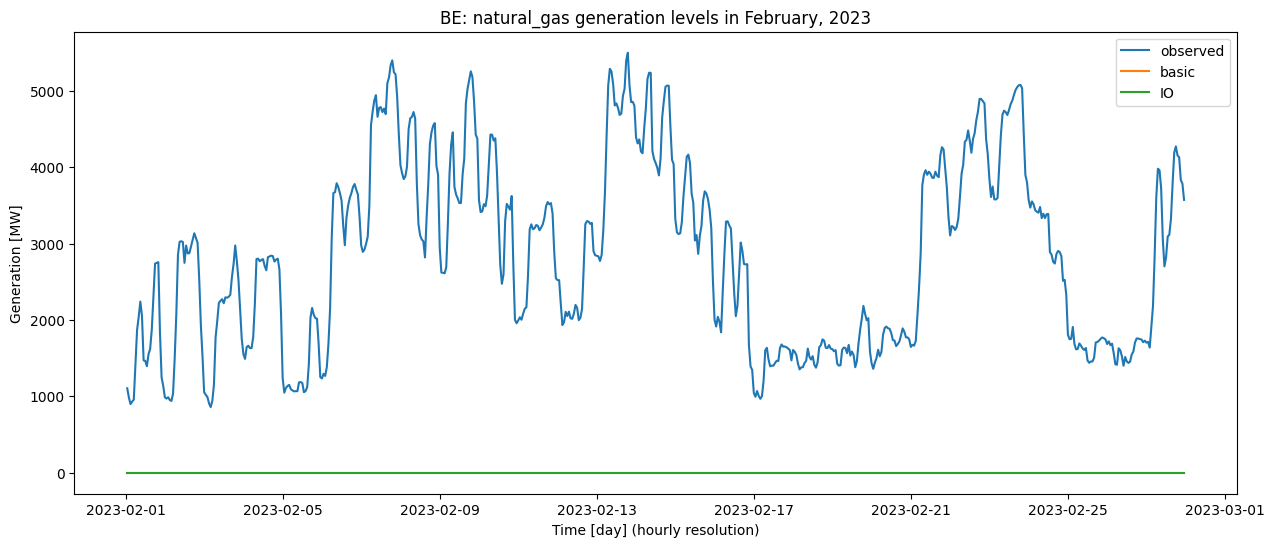

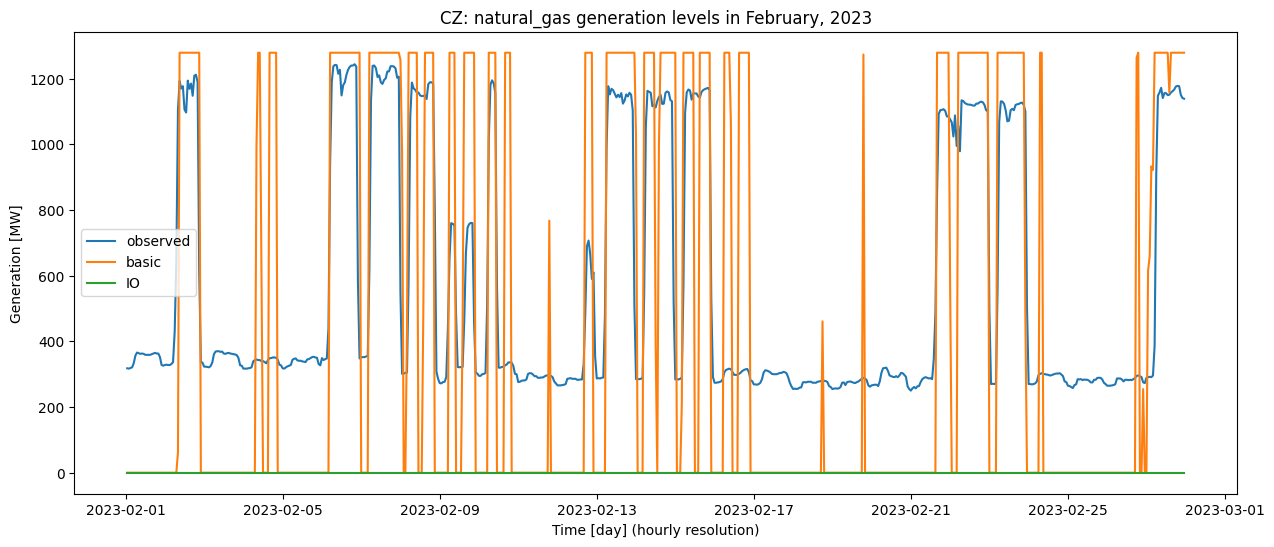

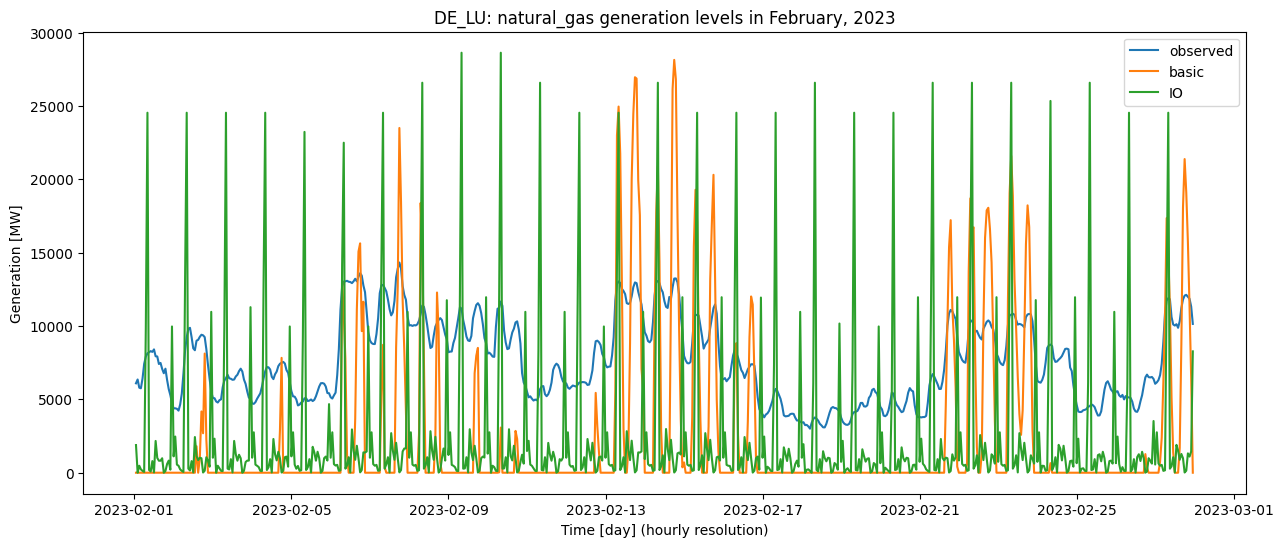

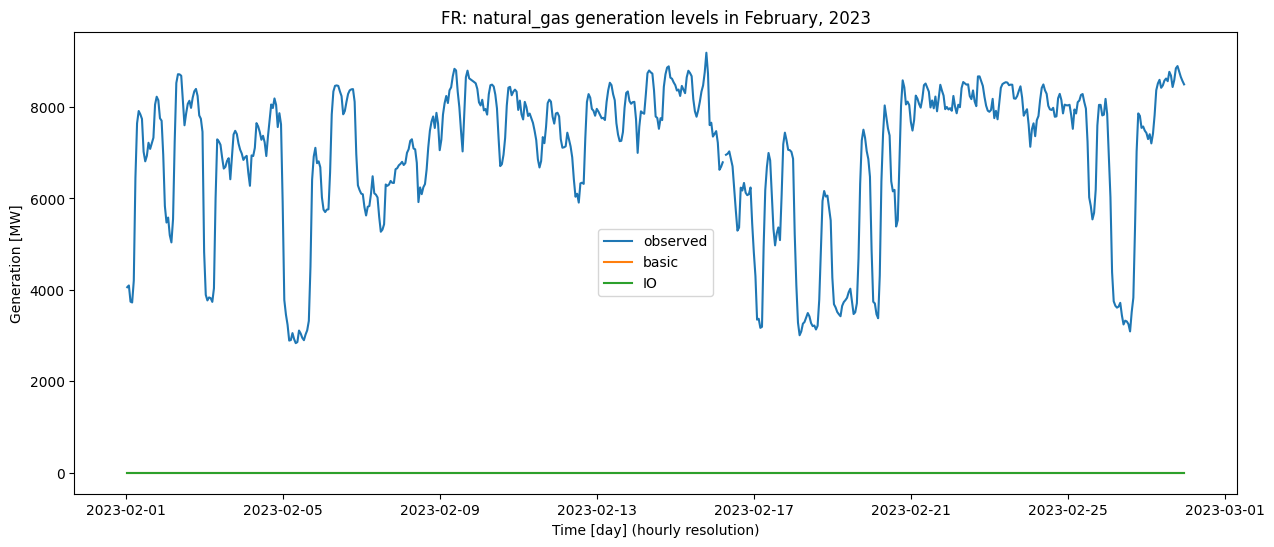

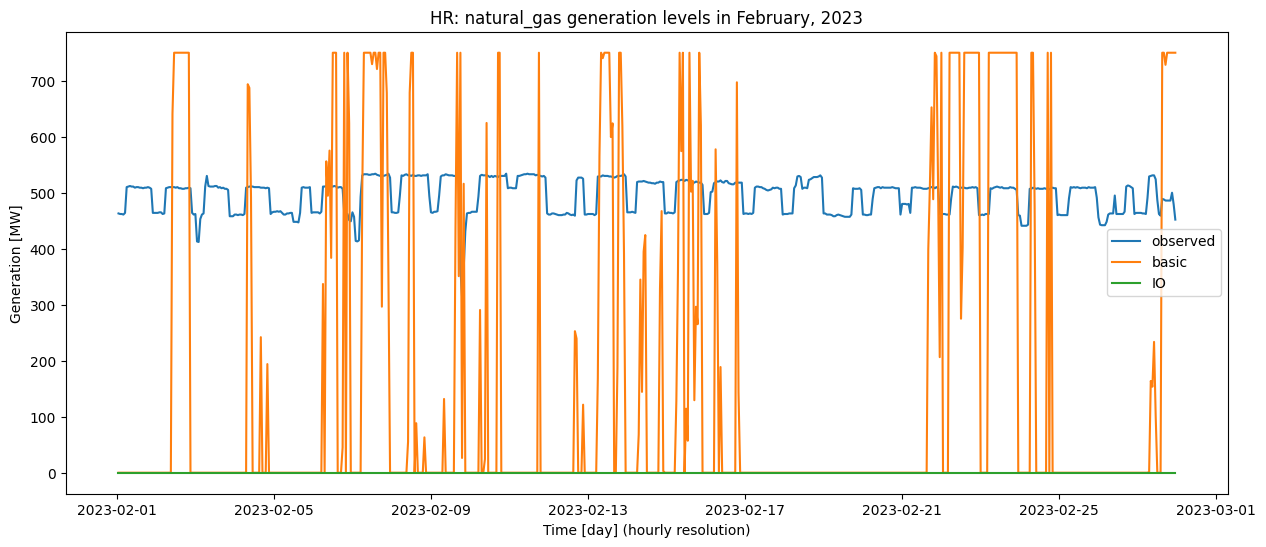

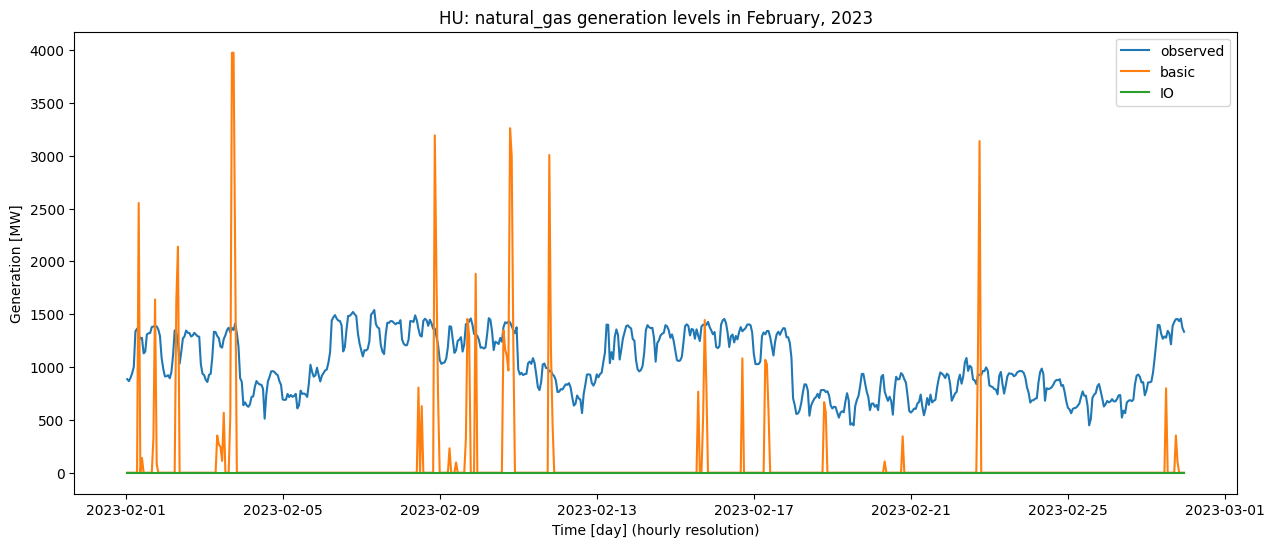

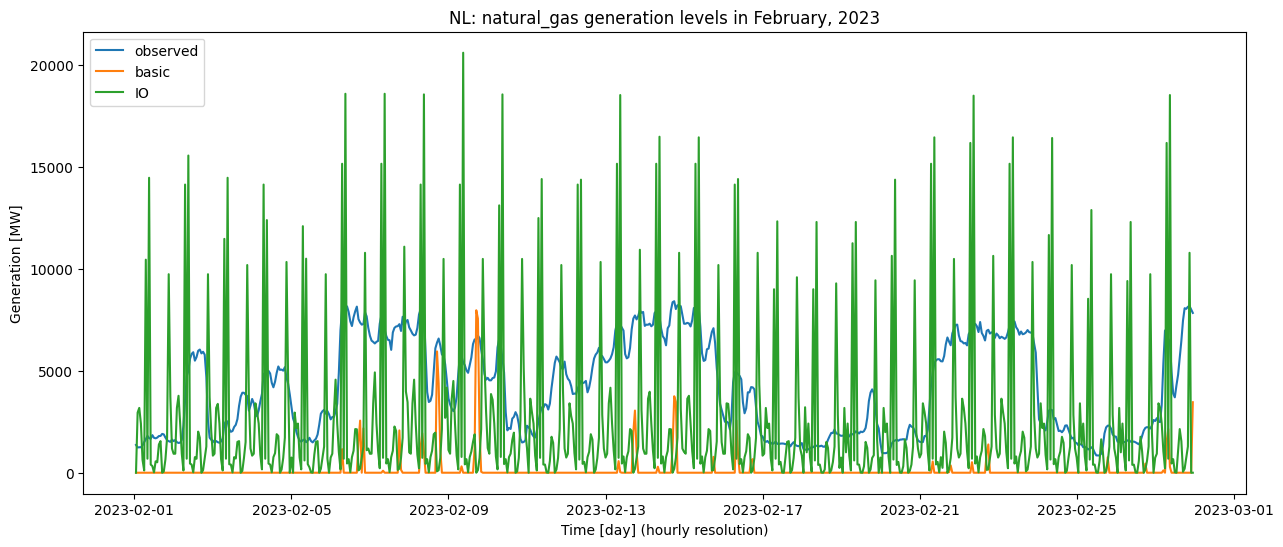

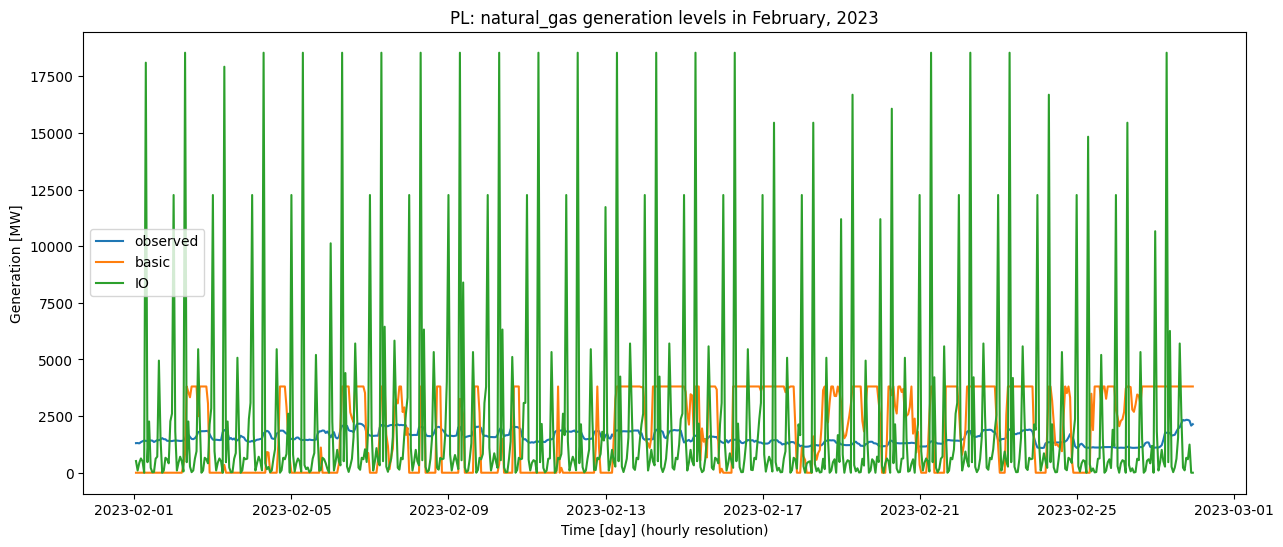

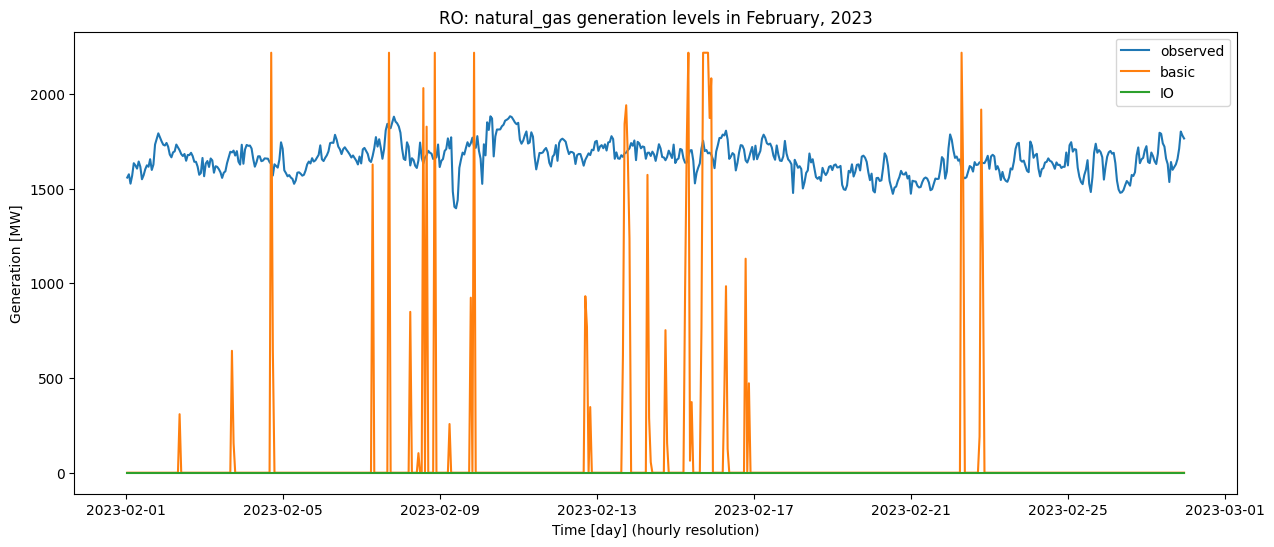

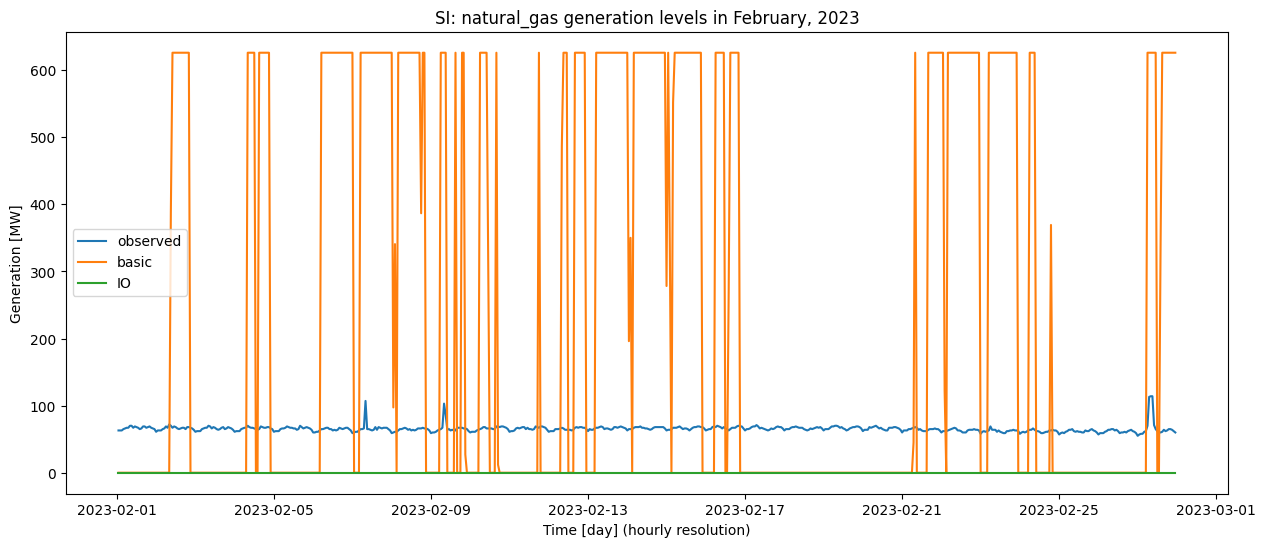

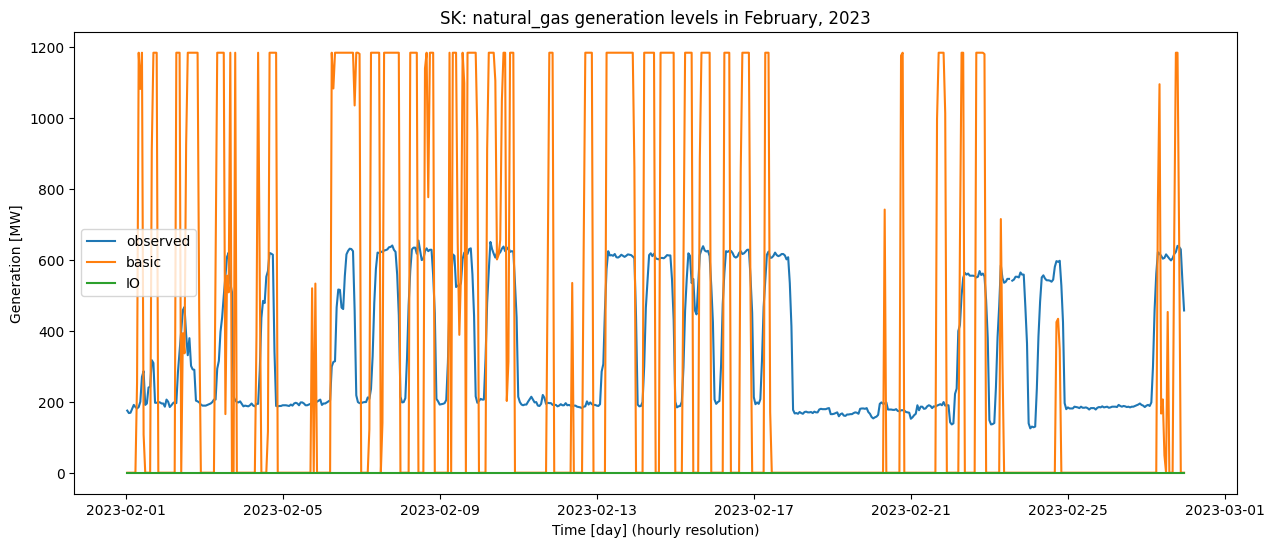

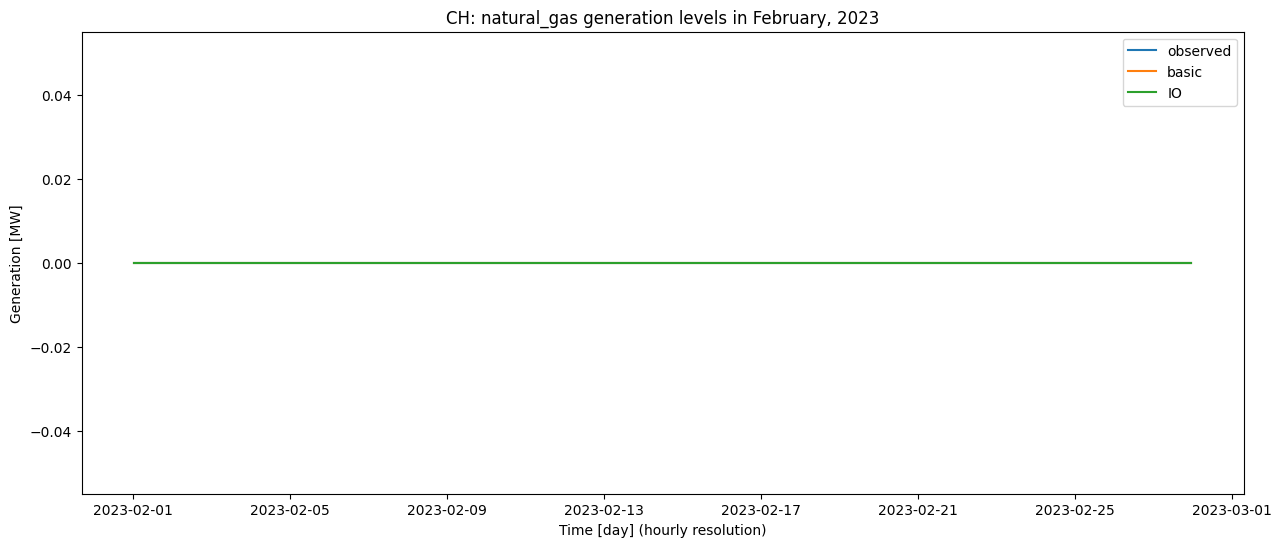

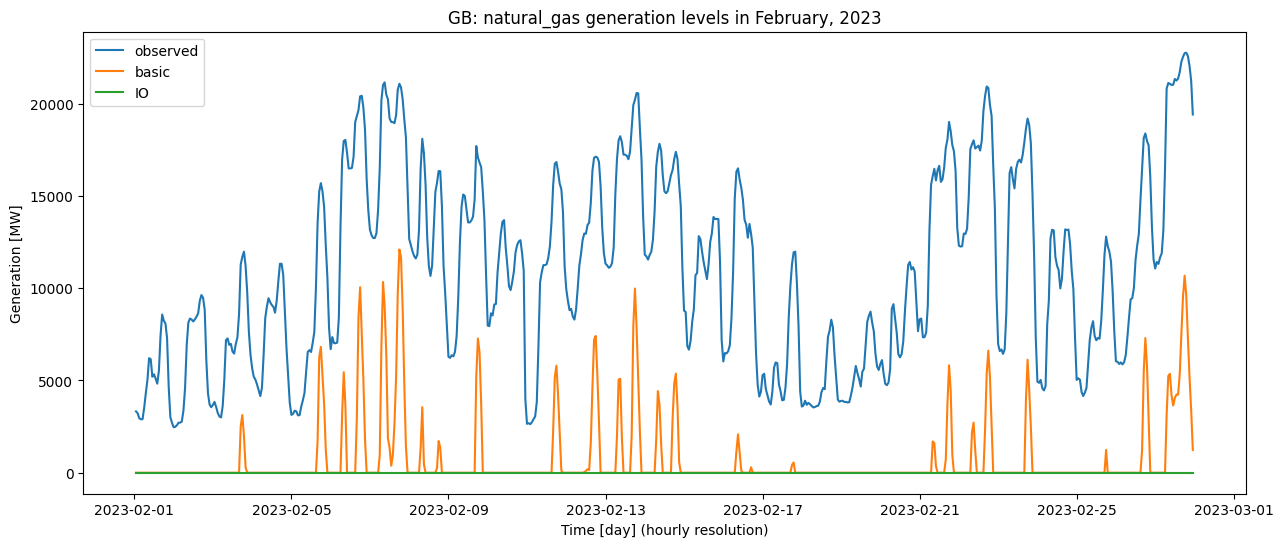

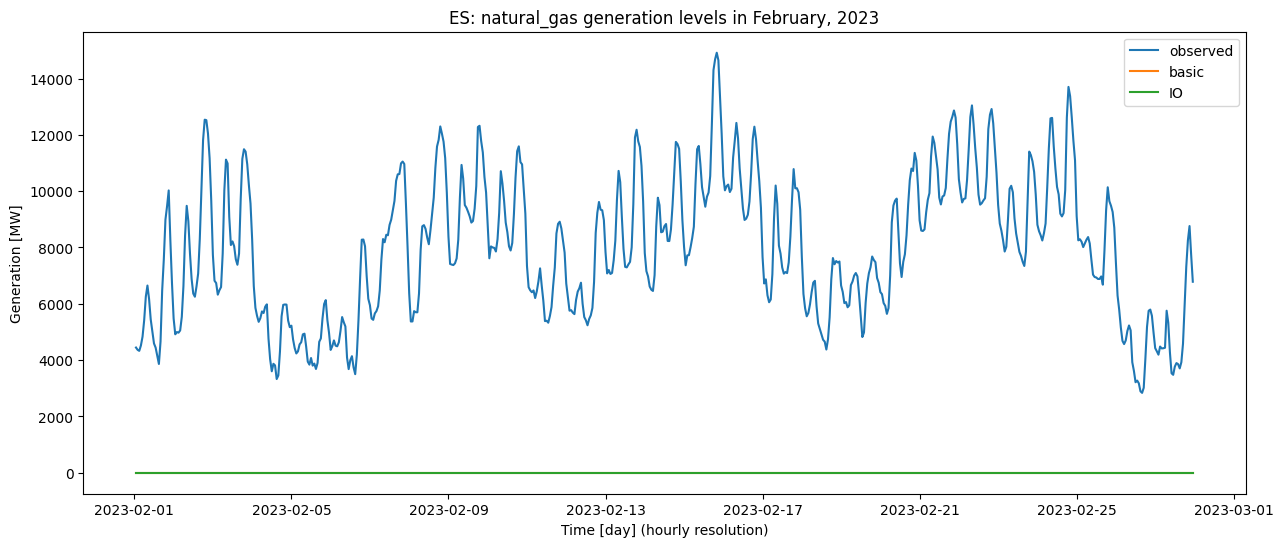

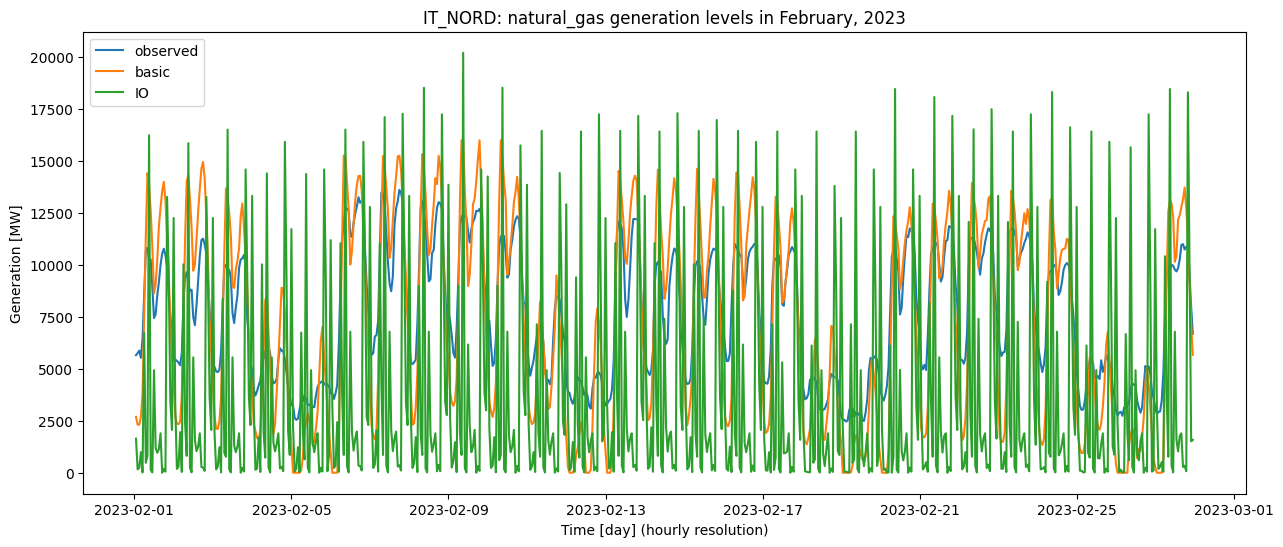

In [116]:
draw_generation_timeseries('natural_gas')